In [ ]:
import CustomProcessing
import modelAPI

In [58]:
train_path = "Data/train/"
test_path = "Data/val/"

In [59]:

numberOfClass,train_data,test_data = CustomProcessing.class_number_and_data(train_path,test_path,augmentation=True)

Found 3770 images belonging to 7 classes.
Found 420 images belonging to 7 classes.


In [60]:
# CustomProcessing.sample_visulization(train_path)

In [61]:
# CustomProcessing.sample_visulization(test_path)

In [62]:
modelInceptionV3=modelAPI.model_create(numberOfClass)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_376 (Conv2D)         (None, None, None, 32)       864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, None, None, 32)       96        ['conv2d_376[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, None, None, 32)       0         ['batch_normalization_37

In [63]:
modelInceptionV3.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [ ]:
batch_size = 32
checkpoint_best,checkpoint_last = CustomProcessing.creat_checkpoint("InceptionV3")
hist = modelInceptionV3.fit_generator(train_data, validation_data=test_data, epochs=100, callbacks=[checkpoint_best, checkpoint_last])

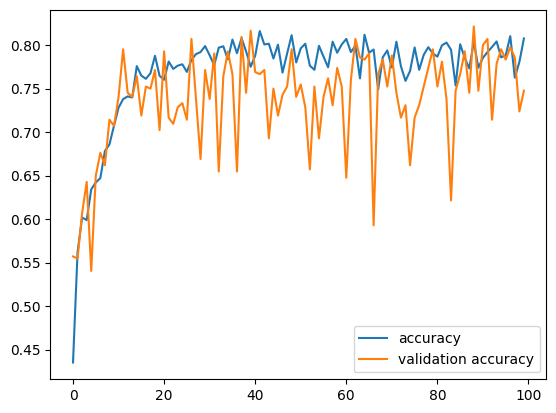

In [ ]:
CustomProcessing.accuracy_plt(hist)

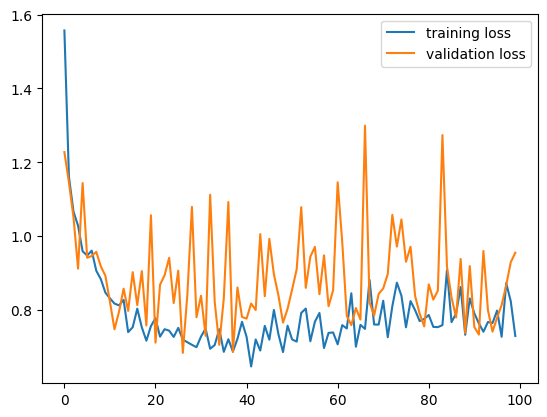

In [ ]:
CustomProcessing.loss_plt(hist)

In [65]:
from tensorflow.keras.models import load_model
import tensorflow as tf
savedModel=load_model('models/best_InceptionV3.h5')


In [ ]:
savedModel.output_shape

(None, 7)

In [ ]:
import tf2onnx
import onnx
# input_signature = [tf.TensorSpec(tf.float32)]
# Use from_function for tf functions
onnx_model, _ = tf2onnx.convert.from_keras(savedModel)
onnx.save(onnx_model, "models/best_inceptionV3.onnx")

In [ ]:
import numpy as np
img_path = "data/val/Umm Qais/360_F_339972467_LNptuA96ebKsuDwadkCKGbMtCmjDZJmk2.jpg"
z=(CustomProcessing.testing(img_path,savedModel))
print(CustomProcessing.mux(z))

In [ ]:
CustomProcessing.plot_result(img_path,CustomProcessing.mux(z))